In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn")

/tmp/ipykernel_95740/2460458607.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [2]:
stock2index = {
    "Microsoft": "MSFT",
    "Netflix": "NFLX",
    "Google": "GOOG",
    "BP": "BP",
    "Blackstone": "BX",
    "Tesla": "TSLA",
}

In [3]:
stock_list = [v for v in stock2index.values()]

df = yf.download(stock_list, "2021-04-01")

[*********************100%***********************]  6 of 6 completed


In [4]:
df.head()

Adj Close                                                 \
                   BP         BX        GOOG        MSFT        NFLX   
Date                                                                   
2021-04-01  22.232817  68.928383  106.887497  237.537247  539.419983   
2021-04-05  21.943375  68.754196  111.277496  244.123779  540.669983   
2021-04-06  22.703161  68.405846  111.237503  242.937805  544.530029   
2021-04-07  22.947376  68.965042  112.484001  244.937302  546.989990   
2021-04-08  22.359446  70.358467  113.272003  248.220764  554.580017   

                            Close                                     ...  \
                  TSLA         BP         BX        GOOG        MSFT  ...   
Date                                                                  ...   
2021-04-01  220.583328  24.580000  75.190002  106.887497  242.350006  ...   
2021-04-05  230.350006  24.260000  75.000000  111.277496  249.070007  ...   
2021-04-06  230.539993  25.100000  74.620003  111.237503  247.860001  ...   
2021-04-07  223.656662  25.370001  75.230003  112.484001  249.899994  ...   
2021-04-08  227.933334  24.719999  76.750000  113.272003  253.250000  ...   

                  Open                                        Volume           \
                  GOOG        MSFT        NFLX        TSLA        BP       BX   
Date                                                                            
2021-04-01  104.897499  238.470001  529.929993  229.456665  14540500  1672100   
2021-04-05  107.647003  242.759995  540.010010  235.903336  19634400  1588800   
2021-04-06  111.125000  247.610001  544.809998  230.100006  24553400  1854000   
2021-04-07  111.306503  247.809998  543.500000  229.000000  15516900  2213100   
2021-04-08  113.898003  252.770004  551.130005  225.793335  19213800  2489100   

                                                    
                GOOG      MSFT     NFLX       TSLA  
Date                                                
2021-04-01  33980000  30338000  3938600  105895200  
2021-04-05  43298000  36910600  3355900  125528400  
2021-04-06  27060000  22931900  3474200   84815400  
2021-04-07  25798000  22719800  2151300   78928200  
2021-04-08  27166000  23625200  4309800   71772900  

[5 rows x 36 columns]

In [5]:
returns = df["Adj Close"].pct_change()
returns = returns.dropna()

returns.head()

,BP,BX,GOOG,MSFT,NFLX,TSLA
Date,,,,,,
2021-04-05,-0.013019,-0.002527,0.041071,0.027728,0.002317,0.044277
2021-04-06,0.034625,-0.005067,-0.000359,-0.004858,0.007139,0.000825
2021-04-07,0.010757,0.008175,0.011206,0.008230,0.004518,-0.029857
2021-04-08,-0.025621,0.020205,0.007005,0.013405,0.013876,0.019122
2021-04-09,-0.013349,0.001954,0.009022,0.010267,0.001316,-0.009915


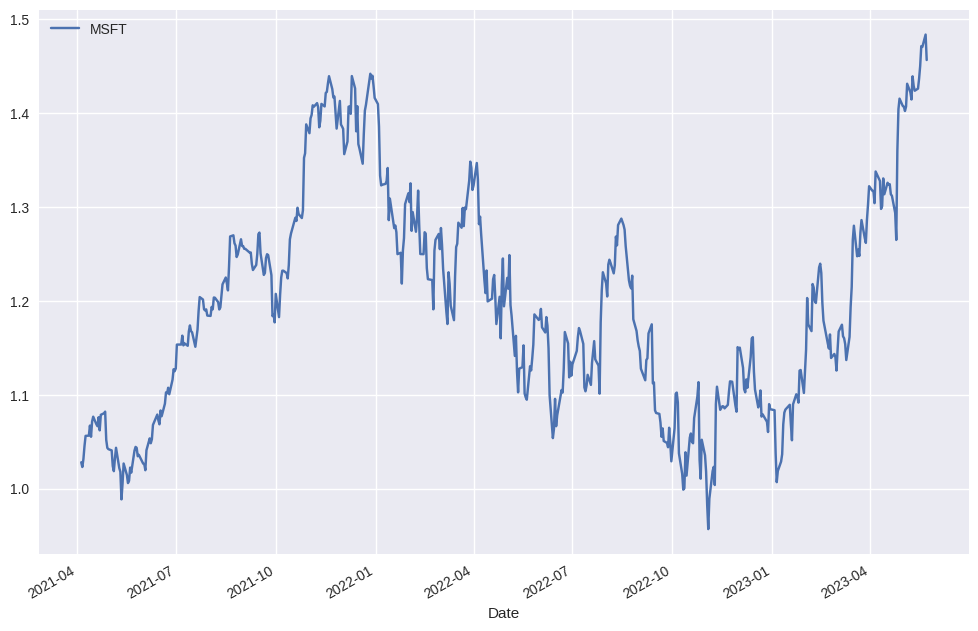

In [6]:
from copy import deepcopy

msft = deepcopy(returns[["MSFT"]])

msft.cumsum().apply(np.exp).plot(figsize=(12,8))
plt.show()

In [7]:
window = 3

In [8]:
msft.dropna(inplace=True)

msft = msft.rename(columns={"MSFT": "returns"})

In [9]:
msft.head()

,returns
Date,
2021-04-05,0.027728
2021-04-06,-0.004858
2021-04-07,0.008230
2021-04-08,0.013405
2021-04-09,0.010267


In [10]:
msft["position"] = -np.sign(msft["returns"].rolling(window).mean())
msft.dropna(inplace=True)

In [11]:
msft["strategy"] = msft.position.shift(1) * msft["returns"]

msft.dropna(inplace=True)

msft.head()

,returns,position,strategy
Date,,,
2021-04-08,0.013405,-1.0,-0.013405
2021-04-09,0.010267,-1.0,-0.010267
2021-04-12,0.000234,-1.0,-0.000234
2021-04-13,0.010082,-1.0,-0.010082
2021-04-14,-0.011219,1.0,0.011219


In [12]:
msft[["returns", "strategy"]].sum().apply(np.exp)

returns     1.412154
strategy    1.609414
dtype: float64

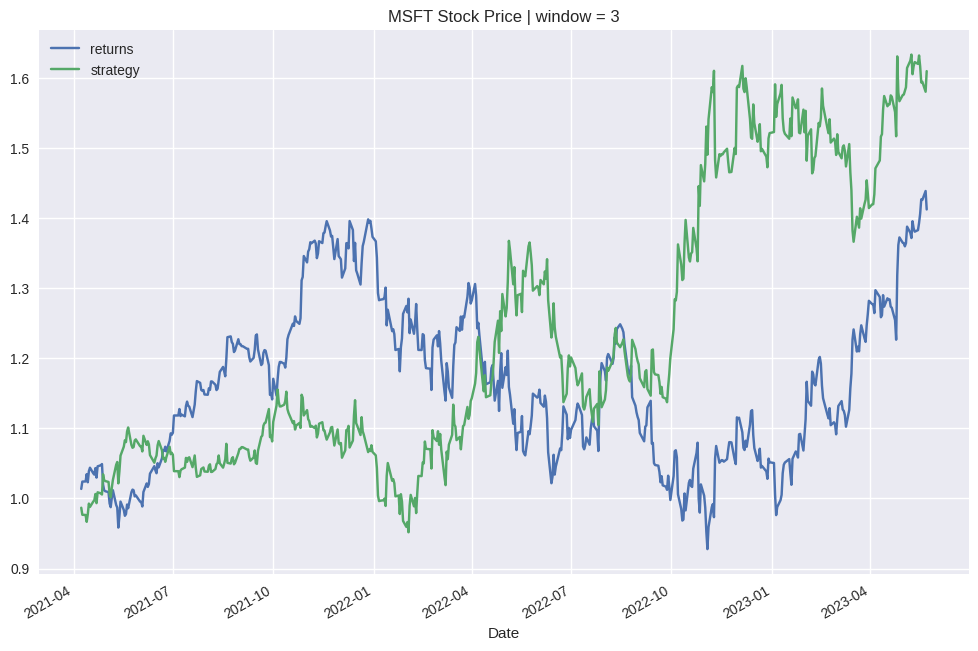

In [13]:
msft[["returns", "strategy"]].cumsum().apply(np.exp).plot(figsize=(12,8), title="MSFT Stock Price | window = 3")
plt.show()